*   Nama: Tuti Amalia
*   Email: amalia.tuti111@gmail.com
*   Asal: Kabupaten Gowa
*   Proyek pertama: menggunakan model NLP
*   Dataset yang digunakan: https://www.kaggle.com/shauryavardhan1/emotion-classifier-dataset




Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential

Download Dataset

In [3]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=12ljMpZL6iYxdiiFSxPcZMbbKh_kixfex'  \
  -O 'archive (1).zip'

--2021-08-07 02:22:02--  https://drive.google.com/uc?export=download&id=12ljMpZL6iYxdiiFSxPcZMbbKh_kixfex
Resolving drive.google.com (drive.google.com)... 142.250.141.139, 142.250.141.101, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n99uie5fjmacsq23uggbgc8r5ve31kbv/1628302875000/12137666749112449155/*/12ljMpZL6iYxdiiFSxPcZMbbKh_kixfex?e=download [following]
--2021-08-07 02:22:03--  https://doc-04-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n99uie5fjmacsq23uggbgc8r5ve31kbv/1628302875000/12137666749112449155/*/12ljMpZL6iYxdiiFSxPcZMbbKh_kixfex?e=download
Resolving doc-04-9g-docs.googleusercontent.com (doc-04-9g-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-04-9g-docs.googleusercontent.com (doc

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
fileZip = 'archive (1).zip'
zipRef = zipfile.ZipFile(fileZip, 'r')
zipRef.extractall('')
zipRef.close()

In [5]:
df = pd.read_csv('Emotion.csv', encoding='windows-1252')
# encoding='utf-8'
df.head()

,id,Text,Emotion,confidence
0,30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
1,30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
2,30002,Been waiting all week for this game ?????? #ch...,joy,0.940
3,30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
4,30004,I feel so blessed to work with the family that...,joy,0.938


Mengambil

In [6]:
df = df.drop(['id', 'confidence'], axis=1)
df.head()

,Text,Emotion
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ?????? #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


Jumlah sampel yang digunakan

In [7]:
len(df)

2581

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


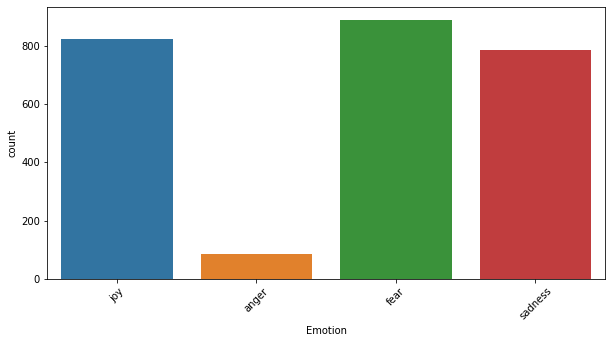

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df['Emotion'])
plt.xticks(rotation=45)
plt.show()

In [9]:
df['Emotion'].value_counts()

fear       888
joy        823
sadness    786
anger       84
Name: Emotion, dtype: int64

In [10]:
#menghapus data yang duplikat
df = df.drop_duplicates(subset="Text")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 0 to 2580
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2566 non-null   object
 1   Emotion  2566 non-null   object
dtypes: object(2)
memory usage: 60.1+ KB


Pembersihan data

In [11]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
def clean_text(text):
    """
        text: a string 
        return: modified clean string
    """
    result = ""
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) >= 2:
            token = token.lower() 
            result+=token+" "     
    return result

df['Text'] = df['Text'].map(clean_text)
df.head()

,Text,Emotion
0,got seeing garydelaney burslem amazing face hu...,joy
1,oh dear evening absolute hilarity think laughe...,joy
2,waiting week game cheer friday,joy
3,gardiner_love thank gloria sweet thoughtful da...,joy
4,feel blessed work family nanny love amp apprec...,joy


Oversampling data yang tidak seimbang

In [12]:
X = df.drop('Emotion',axis=1)
y = df['Emotion']

In [13]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=10)
X_resample, y_resample = oversampler.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
# Check the Fraud and Genuine data distribution after over sampling
from collections import Counter
print('Actual dataset {}'.format(Counter(y)))
print('Undersampled dataset {}'.format(Counter(y_resample)))

Actual dataset Counter({'fear': 888, 'joy': 823, 'sadness': 772, 'anger': 83})
Undersampled dataset Counter({'joy': 888, 'anger': 888, 'fear': 888, 'sadness': 888})


In [15]:
y_resample = pd.DataFrame(y_resample)
y_resample.value_counts()

sadness    888
joy        888
fear       888
anger      888
dtype: int64

Ploting hasil oversampling data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


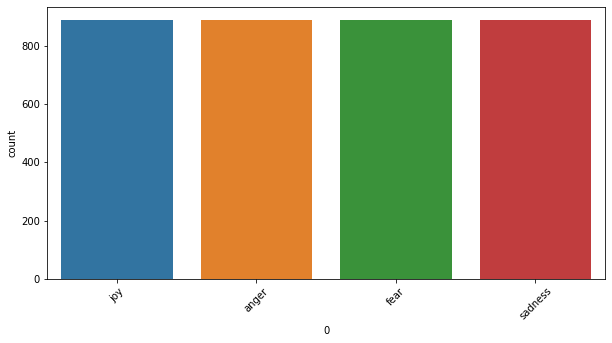

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(y_resample[0])
plt.xticks(rotation=45)
plt.show()

In [17]:
X_resample = pd.DataFrame(X_resample)
X_resample

,0
0,got seeing garydelaney burslem amazing face hu...
1,oh dear evening absolute hilarity think laughe...
2,waiting week game cheer friday
3,gardiner_love thank gloria sweet thoughtful da...
4,feel blessed work family nanny love amp apprec...
...,...
3547,cnn yes cops ppl lost lives alive
3548,optimism delusional pessimism delusional alan ...
3549,dxfyinggrxvity forlorn scanning witches house ...
3550,cardiff amazing days away depressing


In [18]:
y_resample

,0
0,joy
1,joy
2,joy
3,joy
4,joy
...,...
3547,sadness
3548,sadness
3549,sadness
3550,sadness


Mengubah Emotion menjadi One Hot Vector

In [68]:
review = pd.get_dummies(y_resample[0])
review.head()

,anger,fear,joy,sadness
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [20]:
X_resample = X_resample.rename(columns={0 : 'Text'})
X_resample

,Text
0,got seeing garydelaney burslem amazing face hu...
1,oh dear evening absolute hilarity think laughe...
2,waiting week game cheer friday
3,gardiner_love thank gloria sweet thoughtful da...
4,feel blessed work family nanny love amp apprec...
...,...
3547,cnn yes cops ppl lost lives alive
3548,optimism delusional pessimism delusional alan ...
3549,dxfyinggrxvity forlorn scanning witches house ...
3550,cardiff amazing days away depressing


Menggabungkan Emotion dengan text dimana sudah dioversampling

In [21]:
new_df = pd.concat([X_resample, review], axis=1)
new_df

,Text,anger,fear,joy,sadness
0,got seeing garydelaney burslem amazing face hu...,0,0,1,0
1,oh dear evening absolute hilarity think laughe...,0,0,1,0
2,waiting week game cheer friday,0,0,1,0
3,gardiner_love thank gloria sweet thoughtful da...,0,0,1,0
4,feel blessed work family nanny love amp apprec...,0,0,1,0
...,...,...,...,...,...
3547,cnn yes cops ppl lost lives alive,0,0,0,1
3548,optimism delusional pessimism delusional alan ...,0,0,0,1
3549,dxfyinggrxvity forlorn scanning witches house ...,0,0,0,1
3550,cardiff amazing days away depressing,0,0,0,1


In [22]:
new_df.shape

(3552, 5)

In [23]:
X = new_df['Text'].values
y = new_df[['anger', 'fear', 'joy', 'sadness']].values
print(X)
print(y)

['got seeing garydelaney burslem amazing face hurts laughing hilarious '
 'oh dear evening absolute hilarity think laughed long time '
 'waiting week game cheer friday ' ...
 'dxfyinggrxvity forlorn scanning witches house resting elphie grimmerie gone '
 'cardiff amazing days away depressing '
 'jwonder macadamionnut course progress sake progress discouraged problem substance rhetoric ']
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


Membagi validation set sebesar 20% dari total dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print("Total data train: ", len(y_train))
print("Total data test: ", len(y_test))

Total data train:  2841
Total data test:  711


Menggunakan fungsi tokenizer

In [25]:
tokenizer = Tokenizer(num_words=10000, oov_token='x')

In [26]:
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [27]:
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [56]:
padded_train = pad_sequences(sequence_train, maxlen=300, padding="post", truncating="post")
padded_test = pad_sequences(sequence_test, maxlen=300, padding="post", truncating="post")

Menggunakan model sequential dan layer Embedding

In [57]:
model = Sequential([
                    tf.keras.layers.Embedding(10000, output_dim=300),
                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               186880    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)               

In [58]:
# Compile model
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Compiling Model.......')

Compiling Model.......


Menggunakan Callback

In [59]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nYeay, akurasi memenuhi target!')
      self.model.stop_training = True

callbacks = myCallback()

Menjalankan Model

In [60]:
history = model.fit(padded_train, 
                    y_train, 
                    epochs=30, 
                    validation_data=(padded_test, y_test), 
                    callbacks=[callbacks], 
                    verbose=2)

Epoch 1/30
89/89 - 8s - loss: 1.3854 - accuracy: 0.2654 - val_loss: 1.3850 - val_accuracy: 0.2883
Epoch 2/30
89/89 - 5s - loss: 1.3811 - accuracy: 0.3136 - val_loss: 1.3788 - val_accuracy: 0.4416
Epoch 3/30
89/89 - 5s - loss: 1.3638 - accuracy: 0.3784 - val_loss: 1.3437 - val_accuracy: 0.5387
Epoch 4/30
89/89 - 5s - loss: 1.2402 - accuracy: 0.5160 - val_loss: 1.0905 - val_accuracy: 0.5584
Epoch 5/30
89/89 - 5s - loss: 0.9110 - accuracy: 0.5769 - val_loss: 0.8050 - val_accuracy: 0.6695
Epoch 6/30
89/89 - 5s - loss: 0.7978 - accuracy: 0.6748 - val_loss: 0.7523 - val_accuracy: 0.7750
Epoch 7/30
89/89 - 5s - loss: 0.6389 - accuracy: 0.7455 - val_loss: 0.6152 - val_accuracy: 0.8242
Epoch 8/30
89/89 - 5s - loss: 0.5067 - accuracy: 0.8085 - val_loss: 0.5161 - val_accuracy: 0.8636
Epoch 9/30
89/89 - 5s - loss: 0.3838 - accuracy: 0.8712 - val_loss: 0.4333 - val_accuracy: 0.8833
Epoch 10/30
89/89 - 5s - loss: 0.2678 - accuracy: 0.9250 - val_loss: 0.3705 - val_accuracy: 0.8762
Epoch 11/30
89/89 -

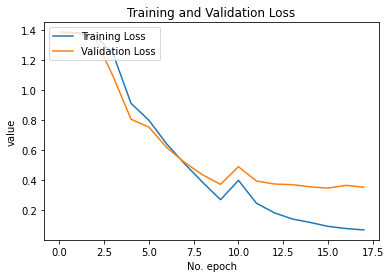

In [61]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

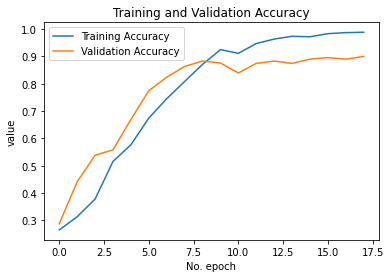

In [62]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()